# Capital Spending Project Feasibility Assessment: The Universe of Checkbook NYC

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
import datetime
import matplotlib.font_manager
from matplotlib import ticker

In [104]:
file_names = ['checkbooknyc/Citywide-Agencies/spending_29351_05312023_040004_part_0.csv', 
'checkbooknyc/Citywide-Agencies/spending_29351_05312023_040004_part_1.csv',
'checkbooknyc/Citywide-Agencies/spending_29351_05312023_040004_part_2.csv',
'checkbooknyc/Citywide-Agencies/spending_29351_05312023_040004_part_3.csv']
df0 = pd.read_csv(file_names[0])
df1 = pd.read_csv(file_names[1])
df2 = pd.read_csv(file_names[2])
df3 = pd.read_csv(file_names[3])
frames = [df0, df1, df2, df3]
df = pd.concat(frames)

facdb = pd.read_csv('facilities.csv')

In [105]:
df.head()
check_sum = sum(df['Check Amount'])
print(check_sum)
#df.info()

152129194370.38358


In [106]:
facdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33429 entries, 0 to 33428
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   facname     33421 non-null  object 
 1   addressnum  28093 non-null  object 
 2   streetname  28441 non-null  object 
 3   address     30375 non-null  object 
 4   city        33224 non-null  object 
 5   zipcode     33060 non-null  float64
 6   boro        33265 non-null  object 
 7   borocode    33265 non-null  float64
 8   bin         25749 non-null  float64
 9   bbl         31364 non-null  float64
 10  cd          32476 non-null  float64
 11  nta2010     32476 non-null  object 
 12  nta2020     32476 non-null  object 
 13  council     32434 non-null  float64
 14  schooldist  32475 non-null  float64
 15  policeprct  32476 non-null  float64
 16  ct2010      32476 non-null  float64
 17  ct2020      32476 non-null  float64
 18  factype     33403 non-null  object 
 19  facsubgrp   33429 non-nul

In [107]:
print("There are {} unique projects captured in Checkbook NYC datasaet.".format(len(df["Contract ID"].unique())))
print("There are {} city agencies captured in the Checkbook NYC dataset.".format(len(df["Agency"].unique())))
print("There are {} facility types in the FacDB dataset, {} facility groups, and {} facility subgroups.".format(len(facdb["factype"].unique()),
len(facdb["facgroup"].unique()), len(facdb["facsubgrp"].unique())))

There are 926562 unique projects captured in Checkbook NYC datasaet.
There are 30 city agencies captured in the Checkbook NYC dataset.
There are 603 facility types in the FacDB dataset, 25 facility groups, and 71 facility subgroups.


## Data Cleaning

In [108]:
# standardize format
df['Issue Date'] = pd.to_datetime(df['Issue Date'])
df['Fiscal year'] = pd.to_datetime(df['Fiscal year'], format='%Y')
df['Agency'] = df['Agency'].str.upper()
df['Budget Code'] = df['Budget Code'].str.upper()
df['Contract Purpose'] = df['Contract Purpose'].str.upper()
df['Spending Category'] = df['Spending Category'].str.upper()

In [109]:
print(df.shape[0])

no_budget = df[df['Budget Code'].isna()]

nine_check = df[df['Check Amount']==99999999]
print(nine_check.shape[0])
print("Number of checks by DOE: {}".format(df[df['Agency']=='DEPARTMENT OF EDUCATION'].shape[0]))
print("Percent of checks by DOE that are weird: {}".format(nine_check.shape[0]/df[df['Agency']=='DEPARTMENT OF EDUCATION'].shape[0]))
print("Percent of money by DOE that is weird: {}".format(sum(nine_check['Check Amount'])/sum(df[df['Agency']=='DEPARTMENT OF EDUCATION']['Check Amount'])))


weird_nums = df[df['Check Amount'] < 0]
print(weird_nums.shape[0])

weird_nums_agencies = weird_nums['Agency'].unique()
nine_check_agencies = nine_check['Agency'].unique()
print(weird_nums_agencies)
print(nine_check_agencies)

no_budget.head(5)

1990934
43
Number of checks by DOE: 1726
Percent of checks by DOE that are weird: 0.024913093858632676
Percent of money by DOE that is weird: 0.12199757057372415
14702
['SCHOOL CONSTRUCTION AUTHORITY' 'DEPARTMENT OF PARKS AND RECREATION'
 'CITY UNIVERSITY OF NEW YORK' 'QUEENS BOROUGH PUBLIC LIBRARY'
 'DEPARTMENT OF ENVIRONMENTAL PROTECTION' 'DEPARTMENT OF TRANSPORTATION'
 'DEPARTMENT OF CULTURAL AFFAIRS'
 'DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES'
 'DEPARTMENT OF SANITATION' 'DEPARTMENT OF SMALL BUSINESS SERVICES'
 'DEPARTMENT OF HEALTH AND MENTAL HYGIENE' 'POLICE DEPARTMENT'
 'NEW YORK PUBLIC LIBRARY' 'HOUSING PRESERVATION AND DEVELOPMENT'
 'FIRE DEPARTMENT'
 'DEPARTMENT OF INFORMATION TECHNOLOGY AND TELECOMMUNICATIONS'
 'DEPARTMENT OF HOMELESS SERVICES' 'BROOKLYN PUBLIC LIBRARY'
 'WATER SUPPLY' "ADMINISTRATION FOR CHILDREN'S SERVICES"
 'DEPARTMENT OF CORRECTION' 'DEPARTMENT OF SOCIAL SERVICES'
 'HEALTH AND HOSPITALS CORPORATION' 'DEPARTMENT OF EDUCATION']
['DEPARTMENT OF EDUCAT

,Agency,Associated Prime Vendor,Budget Code,Capital Project,Check Amount,Contract ID,Contract Purpose,Department,Document ID,Emerging Business,Expense Category,Fiscal year,Industry,Issue Date,M/WBE Category,Payee Name,Spending Category,Sub Contract Reference ID,Sub Vendor,Woman Owned Business
28,DEPARTMENT OF EDUCATION,NaN,NaN,040SCA10 010,99999999.0,PON1040SCA10-14MC,NaN,400-040-704,20110219984-1-DSB-AD,No,CONSTRUCTION-BUILDINGS,2011-01-01,NaN,2010-11-22,Individuals and Others,SCHOOL CONSTRUCTION AUTHORITY,CAPITAL CONTRACTS,NaN,No,No
29,DEPARTMENT OF EDUCATION,NaN,NaN,040SCA09 001,99999999.0,PON1040SCA2005MAST,NaN,IMPLEMENTATION OF THE FOURTH FIVE-YEAR E,20110130448-1-DSB-AD,No,CONSTRUCTION-BUILDINGS,2011-01-01,NaN,2010-09-24,Individuals and Others,SCHOOL CONSTRUCTION AUTHORITY,CAPITAL CONTRACTS,NaN,No,No
30,DEPARTMENT OF EDUCATION,NaN,NaN,040SCA10 010,99999999.0,PON1040SCA10-14MC,NaN,400-040-704,20100082123-1-DSB-AD,No,CONSTRUCTION-BUILDINGS,2010-01-01,NaN,2010-02-25,Individuals and Others,SCHOOL CONSTRUCTION AUTHORITY,CAPITAL CONTRACTS,NaN,No,No
31,DEPARTMENT OF EDUCATION,NaN,NaN,040SCA07 001,99999999.0,PON1040SCA2005MAST,NaN,IMPLEMENTATION OF THE FOURTH FIVE-YEAR E,20100011389-1-DSB-AD,No,CONSTRUCTION-BUILDINGS,2010-01-01,NaN,2010-01-14,Individuals and Others,SCHOOL CONSTRUCTION AUTHORITY,CAPITAL CONTRACTS,NaN,No,No
32,DEPARTMENT OF EDUCATION,NaN,NaN,040SCA08 001,99999999.0,PON1040SCA2005MAST,NaN,IMPLEMENTATION OF THE FOURTH FIVE-YEAR E,20100238273-1-DSB-AD,No,CONSTRUCTION-BUILDINGS,2010-01-01,NaN,2010-06-10,Individuals and Others,SCHOOL CONSTRUCTION AUTHORITY,CAPITAL CONTRACTS,NaN,No,No


In [110]:
# filter out strange and null values

df = df[df['Budget Code'].notna()]
print(df.shape[0])
df = df[df['Check Amount']!=99999999]
print(df.shape[0])
df = df[df['Check Amount'] >= 0]
print(df.shape[0])

1757235
1757209
1742833


1990934 entries to 1742833 after filtering

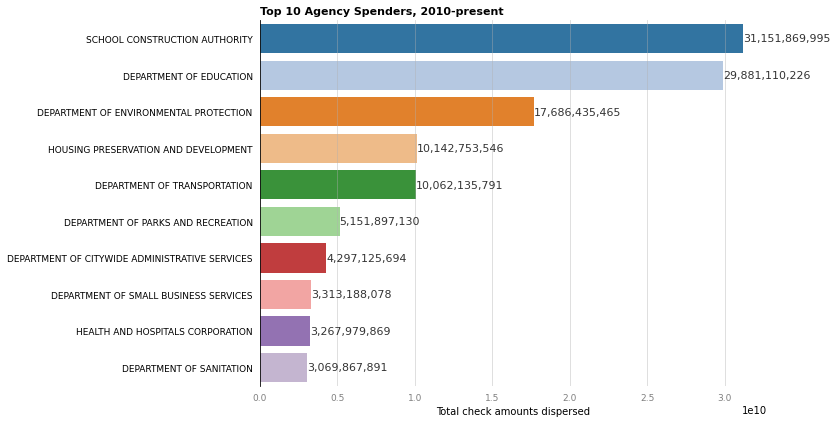

In [111]:
# --- SPENDING BY AGENCY
spending_by_agency = df.groupby('Agency')['Check Amount'].sum().sort_values(ascending=True)
spending_df = spending_by_agency.tail(10).to_frame().reset_index()
spending_df.sort_values('Check Amount', ascending=False, inplace=True)

# --- plot --- 
fig, axs = plt.subplots(figsize=(12,6), nrows = 1)
ax = axs
sns.barplot(data=spending_df, y='Agency', x='Check Amount', ax=ax, palette = 'tab20')

"""
for p in ax.patches:
    ax.annotate( str(p.get_width()), (p.get_width() + 0.75 , p.get_y()+0.075 ), fontsize=9, fontweight='light', alpha = 0.8, color='black', va='bottom')
"""

for p in ax.patches:
    width = p.get_width()
    label = f"{int(width):,}"
    x_pos = width + 5  # Adjust the value (5) to position the labels as needed
    y_pos = p.get_y() + p.get_height() / 2
    ax.annotate(label, (x_pos, y_pos), fontsize=11, fontweight='light', alpha=0.8, color='black', ha='left', va='center')

# tick marks and 0-line
sns.despine(ax=ax, bottom = True )
ax.tick_params( left=False, bottom=False )
ax.set_title("Top 10 Agency Spenders, 2010-present", fontsize=11, fontweight="bold", loc="left")
ax.grid(axis='x', linestyle='-', alpha=0.5, zorder = 0 )
ax.set_ylabel("")
ax.set_xlabel("Total check amounts dispersed")
plt.tight_layout( h_pad=1 )

# change x-tick fonts
for tick in ax.get_xticklabels():
    tick.set_fontsize(9)
    tick.set_color( 'grey' )

# change y-tick fonts
for tick in ax.get_yticklabels():
    tick.set_fontsize(9)
    tick.set_color( 'black' )

#plt.barh(spending_by_agency.index, spending_by_agency)
plt.show()
fig.savefig('top_10_agencies_by_spending.png', facecolor='white', transparent=False)


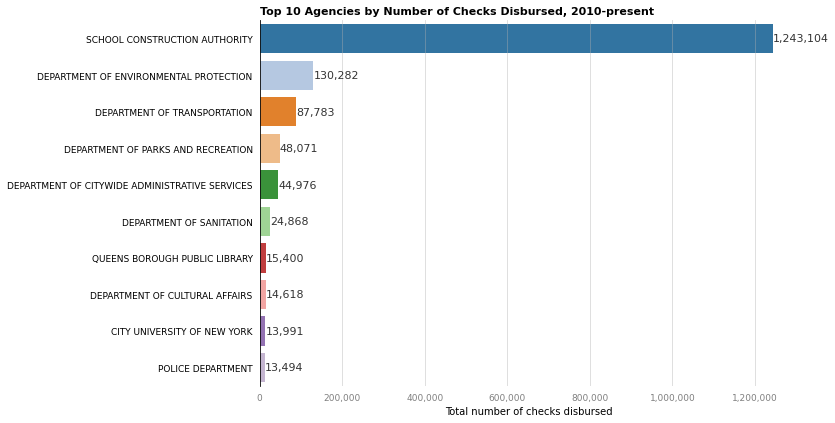

In [112]:
# --- CHECKS BY AGENCY
# agency_counts = df['Agency'].value_counts()
# agency_counts.sort_values(ascending=False, inplace=True)
# agency_counts = agency_counts.head(10)

agency_counts = df.groupby('Agency').size().reset_index()
agency_counts.columns = ['Agency', 'Count']
agency_counts.sort_values(by='Count',ascending=False, inplace=True)
agency_counts = agency_counts.head(10)

# --- plot --- 
fig, axs = plt.subplots(figsize=(12,6), nrows = 1)
ax = axs
ax = sns.barplot(data=agency_counts, y='Agency', x='Count', ax=ax, palette = 'tab20', orient='h')

for p in ax.patches:
    width = p.get_width()
    label = f"{int(width):,}"
    x_pos = width + 5  # Adjust the value (5) to position the labels as needed
    y_pos = p.get_y() + p.get_height() / 2
    ax.annotate(label, (x_pos, y_pos), fontsize=11, fontweight='light', alpha=0.8, color='black', ha='left', va='center')
    # ax.annotate(f"{int(p.get_width()):,}", (p.get_width() + 0.75, p.get_y() + 0.075), fontsize=11, fontweight='light', alpha=1, color='black', va='bottom')

# tick marks and 0-line
sns.despine(ax=ax, bottom = True )
ax.tick_params( left=False, bottom=False )
ax.set_title("Top 10 Agencies by Number of Checks Disbursed, 2010-present", fontsize=11, fontweight="bold", loc="left")
ax.grid(axis='x', linestyle='-', alpha=0.5, zorder = 0 )
ax.set_ylabel("")
ax.set_xlabel("Total number of checks disbursed")
plt.tight_layout( h_pad=1 )

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

# change x-tick fonts
for tick in ax.get_xticklabels():
    tick.set_fontsize(9)
    tick.set_color( 'grey' )

# change y-tick fonts
for tick in ax.get_yticklabels():
    tick.set_fontsize(9)
    tick.set_color( 'black' )

#plt.barh(spending_by_agency.index, spending_by_agency)
plt.show()
fig.savefig('top_10_agencies_by_num_checks.png', facecolor='white', transparent=False)

In [113]:
total_check_sum = df['Check Amount'].sum()
total_per_agency = df.groupby('Agency')['Check Amount'].sum()
percentage_per_agency = (total_per_agency / total_check_sum) * 100
pct_by_agency_df = pd.DataFrame({'Agency' : percentage_per_agency.index, 'Percentage': percentage_per_agency.values})
pct_by_agency_df = pct_by_agency_df.sort_values('Percentage', ascending=False)
print("Top 10 spending agencies by percent of total amount of checks dispersed: {}".format(pct_by_agency_df[:10]))

Top 10 spending agencies by percent of total amount of checks dispersed:                                             Agency  Percentage
25                   SCHOOL CONSTRUCTION AUTHORITY   23.310147
7                          DEPARTMENT OF EDUCATION   22.359270
8           DEPARTMENT OF ENVIRONMENTAL PROTECTION   13.234307
20            HOUSING PRESERVATION AND DEVELOPMENT    7.589563
17                    DEPARTMENT OF TRANSPORTATION    7.529239
13              DEPARTMENT OF PARKS AND RECREATION    3.855033
4   DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES    3.215429
15           DEPARTMENT OF SMALL BUSINESS SERVICES    2.479174
19                HEALTH AND HOSPITALS CORPORATION    2.445346
14                        DEPARTMENT OF SANITATION    2.297104


In [180]:
# capital projects breakdown
total_projects = df['Capital Project'].nunique()
total_proj_per_agency = df.groupby('Agency')['Capital Project'].nunique()
percent_proj_per_agency = (total_proj_per_agency / total_projects) * 100
pct_proj_by_agency_df = pd.DataFrame({'Agency' : percent_proj_per_agency.index, 'Percentage': percent_proj_per_agency.values})
pct_proj_by_agency_df = pct_proj_by_agency_df.sort_values('Percentage', ascending=False)
print("Top 10 agencies by percent of total capital projects captured in Checkbook NYC: {}".format(pct_proj_by_agency_df[:10]))

Top 10 agencies by percent of total capital projects captured in Checkbook NYC:                                             Agency  Percentage
25                   SCHOOL CONSTRUCTION AUTHORITY   37.350081
13              DEPARTMENT OF PARKS AND RECREATION   14.150225
17                    DEPARTMENT OF TRANSPORTATION   11.354234
8           DEPARTMENT OF ENVIRONMENTAL PROTECTION   10.201186
4   DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES    4.276134
6                   DEPARTMENT OF CULTURAL AFFAIRS    3.308291
20            HOUSING PRESERVATION AND DEVELOPMENT    3.106657
14                        DEPARTMENT OF SANITATION    1.928218
18                                 FIRE DEPARTMENT    1.738533
15           DEPARTMENT OF SMALL BUSINESS SERVICES    1.687751


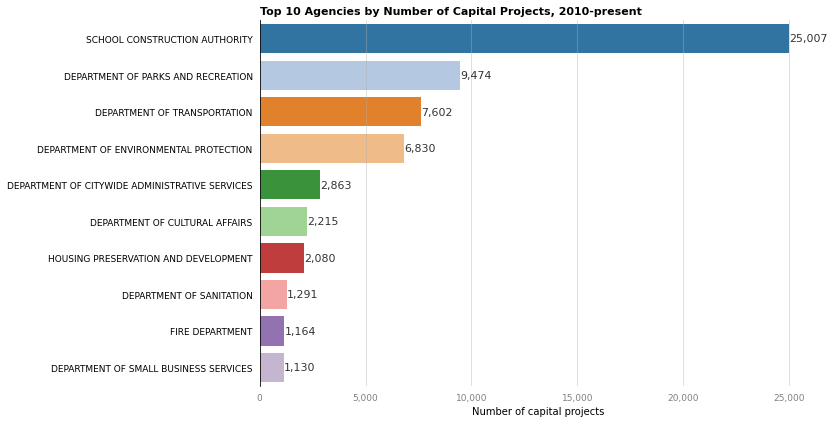

In [184]:
# --- CAPITAL PROJECTS BY AGENCY
# --- CHECKS BY AGENCY

cap_counts = df.groupby('Agency')['Capital Project'].nunique().reset_index()
cap_counts.columns = ['Agency', 'Count']
cap_counts.sort_values(by='Count',ascending=False, inplace=True)
cap_counts = cap_counts.head(10)

# --- plot --- 
fig, axs = plt.subplots(figsize=(12,6), nrows = 1)
ax = axs
ax = sns.barplot(data=cap_counts, y='Agency', x='Count', ax=ax, palette = 'tab20', orient='h')

for p in ax.patches:
    width = p.get_width()
    label = f"{int(width):,}"
    x_pos = width + 5  # Adjust the value (5) to position the labels as needed
    y_pos = p.get_y() + p.get_height() / 2
    ax.annotate(label, (x_pos, y_pos), fontsize=11, fontweight='light', alpha=0.8, color='black', ha='left', va='center')
    # ax.annotate(f"{int(p.get_width()):,}", (p.get_width() + 0.75, p.get_y() + 0.075), fontsize=11, fontweight='light', alpha=1, color='black', va='bottom')

# tick marks and 0-line
sns.despine(ax=ax, bottom = True )
ax.tick_params( left=False, bottom=False )
ax.set_title("Top 10 Agencies by Number of Capital Projects, 2010-present", fontsize=11, fontweight="bold", loc="left")
ax.grid(axis='x', linestyle='-', alpha=0.5, zorder = 0 )
ax.set_ylabel("")
ax.set_xlabel("Number of capital projects")
plt.tight_layout( h_pad=1 )

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

# change x-tick fonts
for tick in ax.get_xticklabels():
    tick.set_fontsize(9)
    tick.set_color( 'grey' )

# change y-tick fonts
for tick in ax.get_yticklabels():
    tick.set_fontsize(9)
    tick.set_color( 'black' )

#plt.barh(spending_by_agency.index, spending_by_agency)
plt.show()
fig.savefig('top_10_agencies_by_cap_projects.png', facecolor='white', transparent=False)

In [114]:
# --- top 10 acronyms
ag_ac = {
    'DEPARTMENT OF EDUCATION':'DOE', 
'SCHOOL CONSTRUCTION AUTHORITY':'SCA',
'DEPARTMENT OF ENVIRONMENTAL PROTECTION':'DEP',
'HOUSING PRESERVATION AND DEVELOPMENT':'HPD',
'DEPARTMENT OF PARKS AND RECREATION':'DPR',
'DEPARTMENT OF TRANSPORTATION':'DOT',
'DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES':'DCAS',
'DEPARTMENT OF SMALL BUSINESS SERVICES':'SBS',
'HEALTH AND HOSPITALS CORPORATION':'HHC',
'DEPARTMENT OF SANITATION':'DSNY'
}

In [115]:
# --- Time series / heat map data

# calculate percentages
total_by_fy = df.groupby('Fiscal year')['Check Amount'].sum()
grouped_data = df.groupby(['Fiscal year', 'Agency'])['Check Amount'].sum().reset_index()

temp_df = grouped_data.copy()
temp_df.loc[:, 'Percent of total check amounts, by FY'] = (temp_df['Check Amount'] / temp_df['Fiscal year'].map(total_by_fy)) * 100

pct_by_agency_by_fy = temp_df.groupby([pd.Grouper(key = 'Fiscal year'), 'Agency'], as_index = False
).agg({'Percent of total check amounts, by FY':'first', 'Fiscal year':'first'}).sort_values(by = 'Fiscal year', ascending = True)
top_10_pct_by_agency_by_fy = pct_by_agency_by_fy[pct_by_agency_by_fy['Agency'].isin(pct_by_agency_df['Agency'].head(10))]
top_10_pct_by_agency_by_fy['Agency Code'] = pct_by_agency_by_fy['Agency'].map(ag_ac)


/var/folders/7p/9414x_x93rvb4p6kc2ny_wl00000gn/T/ipykernel_80606/1564709226.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_pct_by_agency_by_fy['Agency Code'] = pct_by_agency_by_fy['Agency'].map(ag_ac)


/var/folders/7p/9414x_x93rvb4p6kc2ny_wl00000gn/T/ipykernel_80606/886119975.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_data = top_10_pct_by_agency_by_fy.pivot('Agency Code', 'Fiscal year', 'Percent of total check amounts, by FY')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


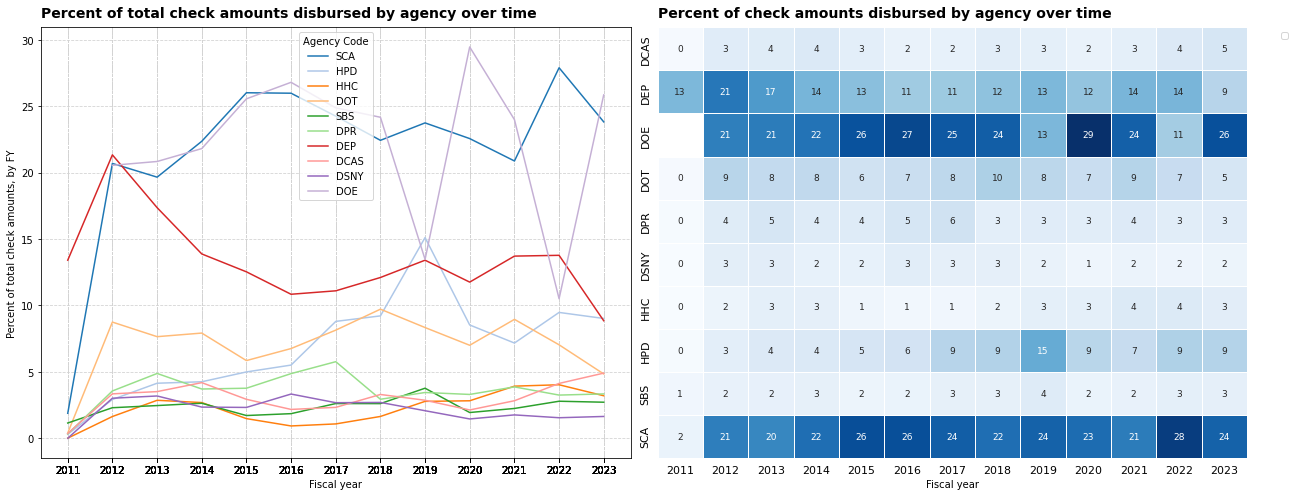

In [117]:
# --- PLOT
fig,axs = plt.subplots( figsize = (18,7) , ncols = 2 )
ax = axs[0]
sns.lineplot(
    data = top_10_pct_by_agency_by_fy,
    x = 'Fiscal year',
    y = 'Percent of total check amounts, by FY',
    hue = 'Agency Code',
    ax= ax ,
    palette = 'tab20',
)
ax.set_title('Percent of total check amounts disbursed by agency over time', fontsize = 14, fontweight = 'bold', loc = 'left', color = 'black', pad = 10 )
ax.set_xticks(top_10_pct_by_agency_by_fy['Fiscal year'])
ax.set_xticklabels([x.strftime('%Y') for x in top_10_pct_by_agency_by_fy['Fiscal year']],
                   rotation=0, ha='center')
ax.grid(True, color='lightgrey', linestyle='--')

# --- heat map
ax = axs[1]
pivot_data = top_10_pct_by_agency_by_fy.pivot('Agency Code', 'Fiscal year', 'Percent of total check amounts, by FY')
sns.heatmap(
    pivot_data,
    cmap = 'Blues',
    annot = True,
    fmt = '.0f',
    annot_kws = {'fontsize':9},
    cbar = False,
    linewidths = 1,
    linecolor = 'w',
    ax = ax
)
ax.legend( loc = 'upper left', bbox_to_anchor = (1.05,1), ncol = 1, fontsize = 9 )
ax.set_xticklabels( [ x.strftime('%Y') for x in pivot_data ] , rotation = 0, ha = 'center' )
ax.tick_params( axis = 'both', which = 'both', left = False, bottom = False, labelsize = 11 )
ax.set_ylabel('')
ax.set_title( "Percent of check amounts disbursed by agency over time", fontsize = 14, fontweight = 'bold', loc = 'left', color = 'black' , pad = 10 )

plt.tight_layout( w_pad = 1 )
fig.savefig('time_series.png', facecolor='white', transparent=False)


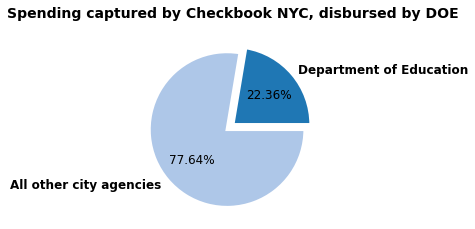

In [166]:
# pie chart of percent DOE money spent vs. everything 
fig, ax = plt.subplots(figsize=(6,6))
doe_percent_money = sum(df[df['Agency']=='DEPARTMENT OF EDUCATION']['Check Amount'])/total_check_sum
data = [doe_percent_money, (1-doe_percent_money)]
labels = ['Department of Education', 'All other city agencies']
patches, texts, pcts = ax.pie(data, labels=labels, colors=sns.color_palette('tab20'), autopct='%.2f%%',
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'large'},
       startangle=360,
       explode=(0, 0.1))
ax.set_title('Spending captured by Checkbook NYC, disbursed by DOE',  fontsize = 14, fontweight = 'bold', color = 'black', pad = 10 )
plt.setp(pcts, color='black', fontweight=400)
plt.setp(texts, fontweight=600)
plt.tight_layout()
fig.savefig('percent_doe.png', facecolor='white', transparent=False, bbox_inches='tight')

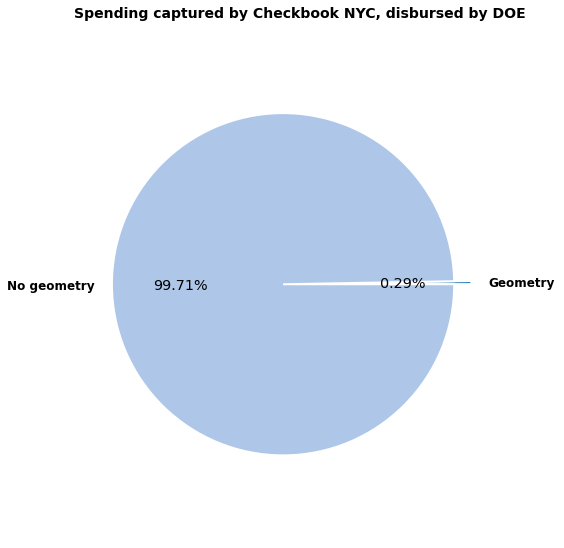

In [176]:
doe_percent_money_mapped = 0.00286363600113958
data = [doe_percent_money_mapped, (1-doe_percent_money_mapped)]
labels = ['Geometry', 'No geometry']
# pie chart of percent DOE money spent vs. everything 
fig, ax = plt.subplots(figsize=(8,8))
patches, texts, pcts = ax.pie(data, labels=labels, colors=sns.color_palette('tab20'), autopct='%.2f%%',
wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
       textprops={'size': 'large'},
       startangle=360,
       explode=(0, 0.1))
ax.set_title('Spending captured by Checkbook NYC, disbursed by DOE',  fontsize = 14, fontweight = 'bold', color = 'black', pad = 10 )
plt.setp(pcts, color='black', fontweight=400, size='x-large')
plt.setp(texts, fontweight=600)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.tight_layout()
fig.savefig('percent_geom.png', facecolor='white', transparent=False, bbox_inches='tight')